<a href="https://www.kaggle.com/code/amirhosseinzinati/credit-card-fraud-detection-using-som?scriptVersionId=135995549" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In this way you can install Minisom or any other libaries. The SOM is the very basic deep learning unsupervised model used for the credit card fraud detection where in you can easily by seeing the graphs can tell about the results

Ok.. So lets start hope you will enjoy :)

In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... - \ done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10607 sha256=d03afa67651f1b95302dc6800c38d24f4577bb499e9980967807b367bd3dff37
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [2]:
from minisom import MiniSom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from pylab import bone, pcolor, colorbar, plot, show

# SOM:
The Self Organizing Maps (SOM) are a type of Artificial Neural Networks able to convert complex, nonlinear statistical relationships between high-dimensional data items into simple geometric relationships on a low-dimensional display.

The figure below illustrates how we train a self-organizing map. The purple blob is the distribution of the training data. The small white disc is the current training data point drawn from that distribution. At first, the SOM nodes are arbitrarily positioned in the data space. The node (highlighted in yellow) nearest the training data point is selected. It is pulled towards the training data point. In each iteration, the nearest neighbors within a specified radius are also pulled towards this yellow node and their weights get updated. After many iterations, the grid tends to approximate the data distribution (right).



The Euclidean distance to all weight vectors is computed when we feed the training data into the network. The neuron whose weight vector is most similar to the input is called the best matching unit (BMU). The weights of the BMU and neurons close to it in the SOM grid are adjusted towards the input vector. Once the BMU has been determined, the next step is to calculate which of the other nodes are within the BMU’s neighborhood.

* SOMs differ from other artificial neural networks because they apply competitive learning as opposed to error correlated learning, which involves backpropagation and gradient descent.
* The training data usually has no labels and the map learns to differentiate and distinguish features based on similarities.
* SOMs are used for Visualization purposes, fraud detection among other applications

# Import Data


In [3]:
df = pd.read_csv('/kaggle/input/credit-card-applications/Credit_Card_Applications.csv')
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
info = pd.DataFrame()
info.insert(0,"Data Type",df.dtypes ,True)
info.insert(1,"Column Real Name",df.columns,True)
info.insert(2,"IsNull",df.isnull().sum(),True)
info.insert(3,"IsNa",df.isna().sum(),True)
info.insert(4,"Unique",df.nunique(),True)
info.insert(5,"Duplicate Values",df.duplicated().sum(),True)
info.insert(6,"Min",df.min(),True)
info.insert(7,"Max",df.max(),True)
info.T

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
Data Type,int64,int64,float64,float64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64
Column Real Name,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
IsNull,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
IsNa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Unique,690,2,350,215,3,14,8,132,2,2,23,2,3,171,240,2
Duplicate Values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Min,15565714.0,0.0,13.75,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Max,15815443.0,1.0,80.25,28.0,3.0,14.0,9.0,28.5,1.0,1.0,67.0,1.0,3.0,2000.0,100001.0,1.0


as you can see there is no Null ,Nan and duplicated row.

 SOM is an unsupervised algorithm. Hence, we need to remove Target variable from our dataframe for our analysis


In [5]:
X = df.drop(columns={"Class"},axis=1)
y =df["Class"]
label_names = {0:'Not Approved  ', 1:'Approved '}
type(y)

pandas.core.series.Series

The reason for keeping customer ID is that, in the end, to detect fraud, we need it.

# Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc =minMaxScaler = MinMaxScaler(feature_range = (0,1))
sc.fit(X)
X = sc.transform(X)
type(X)

numpy.ndarray

# Training the SOM

Training the SOM
MiniSom is a minimalistic and Numpy based implementation of the Self Organizing Maps (SOM).
This means that in order to use MiniSom, your data needs to be organized as a Numpy matrix where each row corresponds to an observation or as list of lists.
Our input data X is already in numpy.ndrray format

Parameters:

* **x, y** : correspond to the dimensions of the SOM
* **input_len** : number of features used in the training dataset
* **Sigma**: is the radius of the different neighbors in the SOM. The default value for this is 1.0.
* **learning_rate** : determines how much weights are adjusted during each iteration.
* The training algorithm implemented decreases both parameters (sigma and learning_rate) as training progresses. This allows rapid initial training of the neural network that is then "fine tuned" as training progresses.
* MiniSom implements two types of training: train_random and train_batch. In train_random, we train the model by picking random samples from our data. In train_batch, the samples are picked in the order that they are stored.
* **random_weights_init** method initializes the weights by picking random samples from the data.

In [7]:
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5,random_seed=43)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

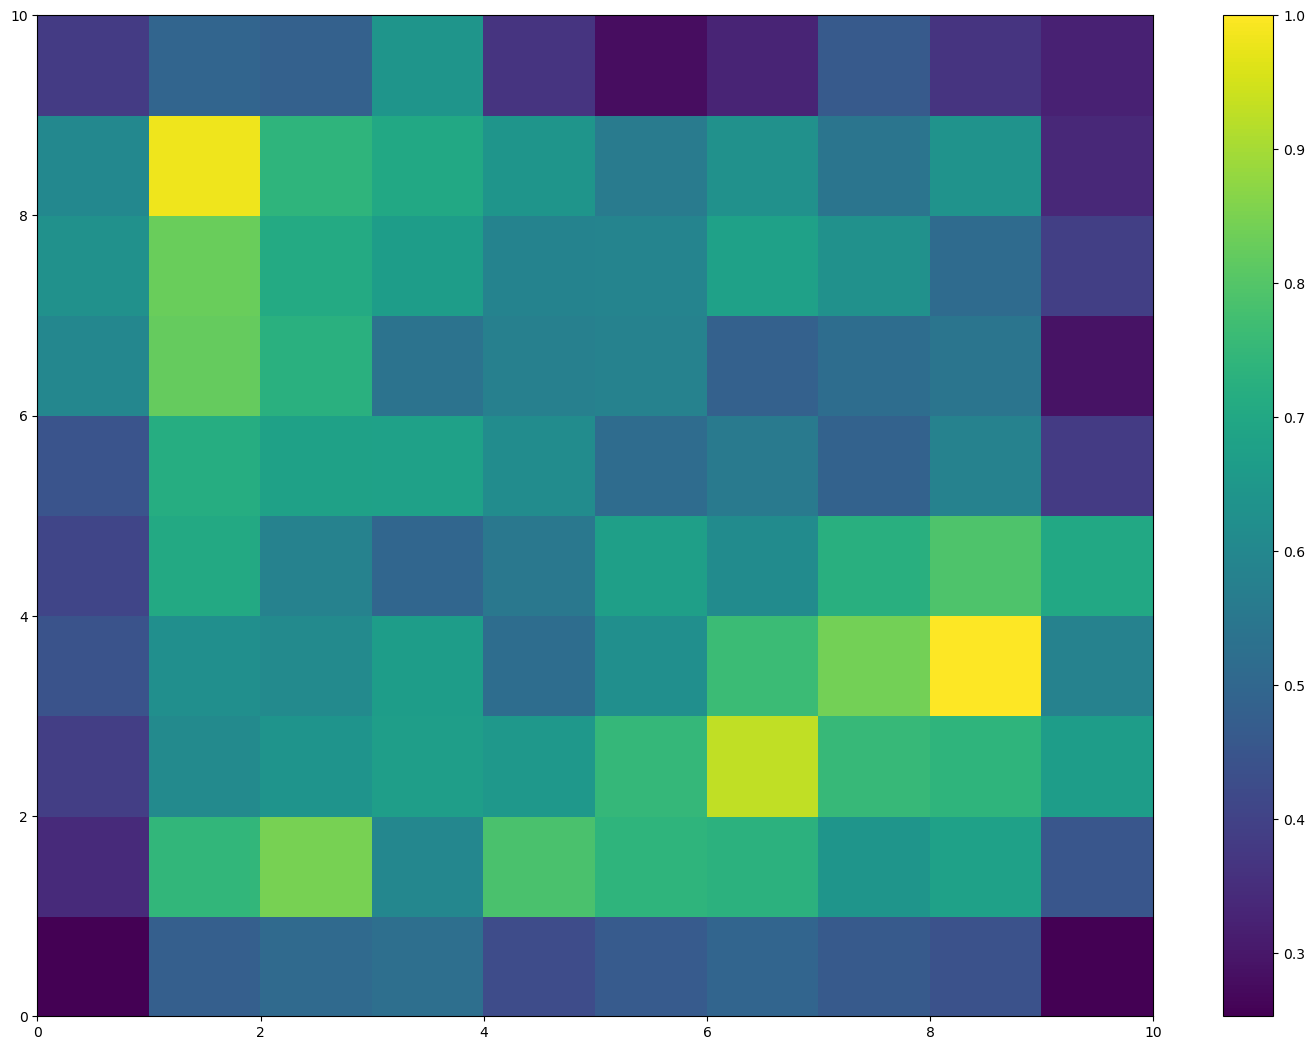

In [8]:
plt.figure(figsize=(18, 13)) # To make the fig bigger 

pcolor(som.distance_map().T) # This line finds out the mean inter neuron distance and makes a map based on these distances.
                             # It makes clusters based on the colours based on the distances. The darker the colour the closer the neurons is to it's neighbourhood.
                             # The lighter neurons are the outliers and if customers are present in it that means they are fradulent.
colorbar()

# Visualizing the Results

* **bone**: Set the colormap to 'bone'. This changes the default colormap as well as the colormap of the current image if there is one.
* **pcolor**: Create a pseudocolor plot with a non-regular rectangular grid.
* **distance_map**: Returns all mean inter-neuron distances for all winning nodes
* **colorbar**: The colorbar() function in pyplot module of matplotlib adds a colorbar to a plot indicating the color scale.
* **winner**: To obtain the position of the winning neuron on the map for a given sample

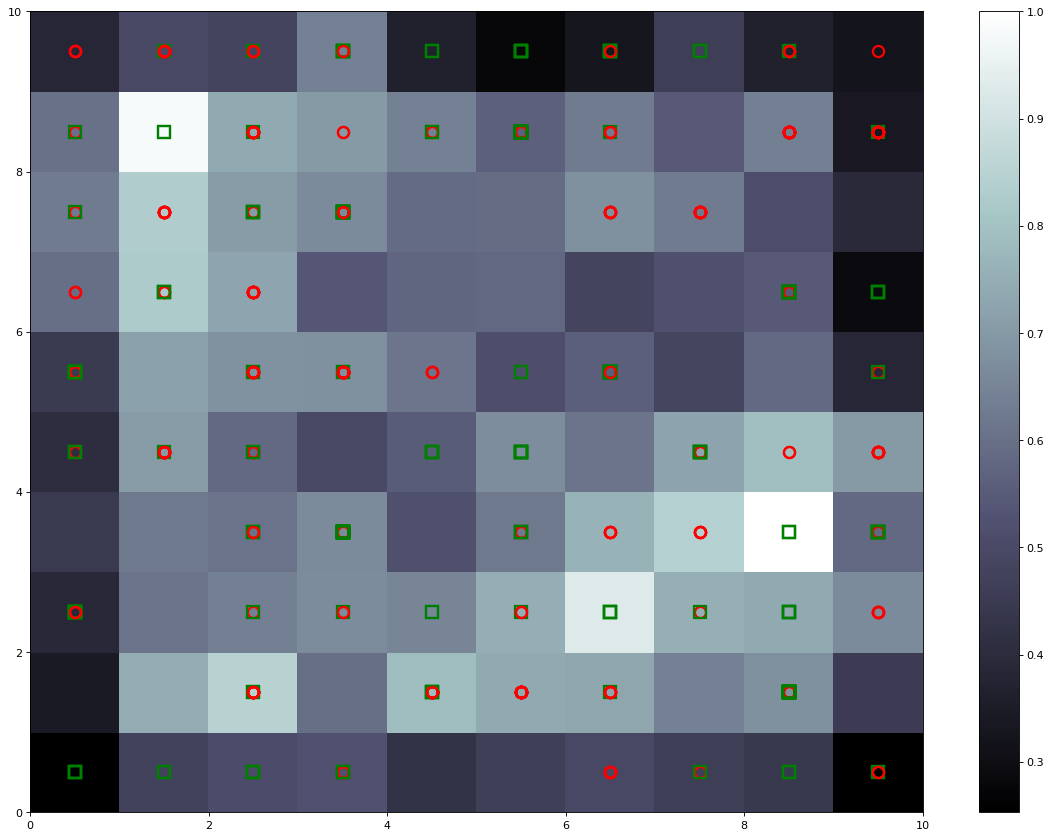

In [9]:
plt.figure(figsize=(18, 13), dpi= 80, facecolor='w', edgecolor='k') # To make the fig bigger 

bone()
pcolor(som.distance_map().T) # distance map as background
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    # w[0], w[1] will place the marker at bottom left corner of the rectangle. 
    #Let us add 0.5 to both of these to plot the market at the center of the rectange.
    plot(w[0] + 0.5, 
         w[1] + 0.5,
         #Target value 0 will have marker "o" with color "r"
         #Target value 1 will have marker "s" with color "g"
         markers[y[i]], 
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None', #No color fill inside markers
         markersize = 10,
         markeredgewidth = 2)
show()

# Finding the Frauds

The outlier categories are the frauds.

As you can see there are 2 outliers categories (white) at co-ordinates (2,9) and (9,4). Which means under these categories customers are most likely to be frauds.

As there can be many customers in a category. In both of these categories there are both green square and red circle, which means that some of them got their credit card approved too.

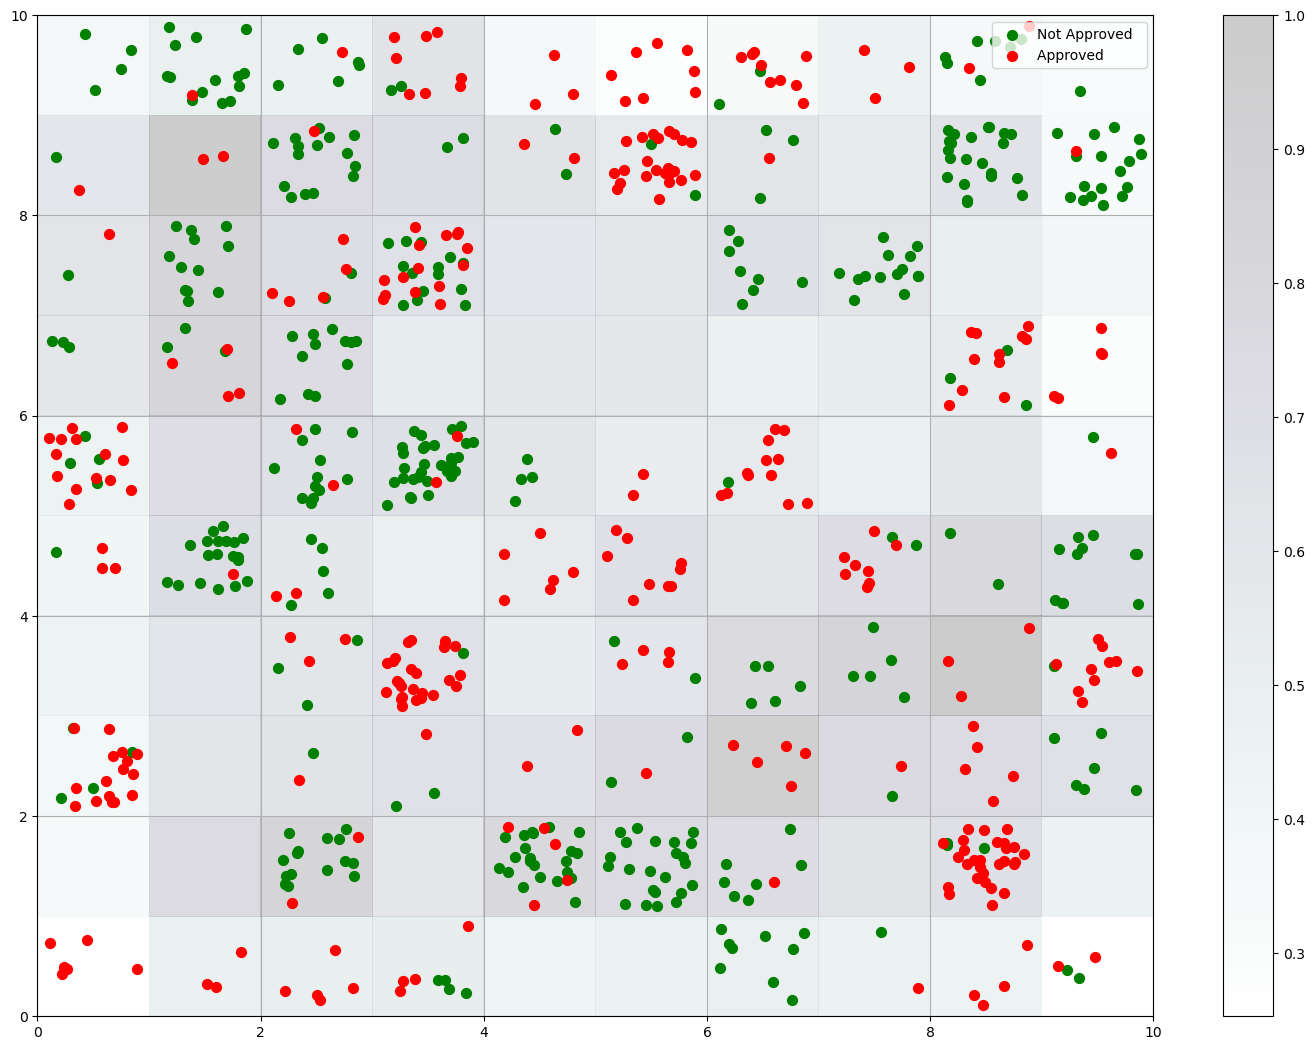

In [10]:
w_x, w_y = zip(*[som.winner(d) for d in X])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(18, 13))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(y):
    idx_target = y==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [11]:
# Finding the frauds
mappings = som.win_map(X) # dictionary of mappings from winning node coordinates to customers
mappings.keys() #keys are the coordinates in the plot

dict_keys([(1, 4), (3, 5), (1, 7), (0, 2), (5, 8), (5, 4), (6, 0), (3, 3), (8, 8), (6, 5), (8, 6), (6, 1), (2, 5), (8, 1), (3, 0), (2, 4), (4, 1), (3, 2), (7, 7), (5, 1), (3, 7), (0, 0), (0, 5), (2, 8), (9, 2), (9, 8), (2, 1), (9, 6), (4, 5), (4, 4), (5, 9), (1, 9), (6, 8), (9, 3), (1, 0), (7, 3), (3, 9), (6, 9), (6, 7), (2, 9), (0, 9), (2, 6), (1, 6), (6, 2), (5, 5), (2, 0), (7, 2), (9, 4), (8, 2), (2, 3), (3, 8), (8, 3), (8, 9), (2, 7), (0, 4), (5, 3), (7, 0), (2, 2), (9, 5), (7, 4), (0, 8), (4, 2), (4, 8), (8, 0), (7, 9), (9, 0), (0, 6), (0, 7), (1, 8), (4, 9), (8, 4), (5, 2), (9, 9), (6, 3)])

In [12]:
# from fig squares (7,5) seem like potential fraudulent customers - white color - maximum mean interneuron distance
frauds = np.concatenate((mappings[(2,9)],mappings[(9,4)]),axis=0)
np.asarray(frauds).shape

(18, 15)

In [13]:
frauds = sc.inverse_transform(frauds)  #inverse feature scaled to the original values
np.asarray(frauds).shape

(18, 15)

In [14]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
    print(int(i))
print ("Fraud Customer Count is :",len(frauds[:,0]))

Fraud Customer IDs
15636767
15713983
15648681
15763194
15666012
15740411
15790689
15651868
15716082
15651460
15672637
15752344
15736533
15779207
15611409
15609987
15636454
15615296
Fraud Customer Count is : 18


And thus the above is the list of the customers who have cheated and now its bank duty to analyse this data and give their data analyst to perform some logic to indentify it correctly